In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

In [2]:
file_path = "DATA/SBQ_CSV.csv"
data = pd.read_csv(file_path, delimiter=",", quotechar='"', on_bad_lines='skip')

def plot_keyword_bar(keywords_counts, context_label="Keywords", bar_color="royalblue", max_y_text_pos=18):
    keywords, counts = zip(*keywords_counts)
    
    plt.figure(figsize=(10, 6))
    bars = plt.barh(keywords, counts, color=bar_color)

    for bar, count in zip(bars, counts):
        plt.text(bar.get_width() / 2,
                 bar.get_y() + bar.get_height() / 2,
                 str(count),
                 ha='center', va='center', fontsize=12, color='white')

    plt.text(max(counts) * 0.6, max_y_text_pos, context_label,
             fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

    plt.xlabel('Frequency')
    plt.ylabel('Keywords')
    plt.tight_layout()
    plt.show()

def plot_keyword_wordcloud(keyword_counter, title="WordCloud of Unified Keywords"):
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

keyword_mapping = {}

def reverse_map_keyword(keyword, mapping):
    for main_keyword, variations in mapping.items():
        if keyword.lower() == main_keyword.lower() or keyword.lower() in variations or main_keyword.lower() in keyword.lower():
            return main_keyword
    else:
        return keyword

import pandas as pd
import matplotlib.pyplot as plt

def plot_comparison_bar(counts_a, counts_b, label_a="Year A", label_b="Year B",
                        bar_colors=("red", "purple"), title="Keyword Frequency Comparison", n=20):
    combined_keywords = (counts_a + counts_b).most_common(n)
    keywords = [k for k, _ in combined_keywords]

    
    df = pd.DataFrame({
        label_a: [counts_a.get(k, 0) for k in keywords],
        label_b: [counts_b.get(k, 0) for k in keywords]
    }, index=keywords)

    ax = df.plot(kind='barh', figsize=(10, 6), color=bar_colors)

   
    for i, keyword in enumerate(df.index):
        val_a = df.loc[keyword, label_a]
        val_b = df.loc[keyword, label_b]
        
        if val_a > 0:
            ax.text(val_a + 0.5, i - 0.15, str(val_a), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[0], edgecolor='none', boxstyle='round,pad=0.2'))
        
        if val_b > 0:
            ax.text(val_b + 0.5, i + 0.15, str(val_b), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[1], edgecolor='none', boxstyle='round,pad=0.2'))

    plt.xlabel("Frequency")
    plt.ylabel("Keyword")
    #plt.title(title)
    plt.gca().invert_yaxis() 
    plt.tight_layout()
    plt.show()


Unbiased counting

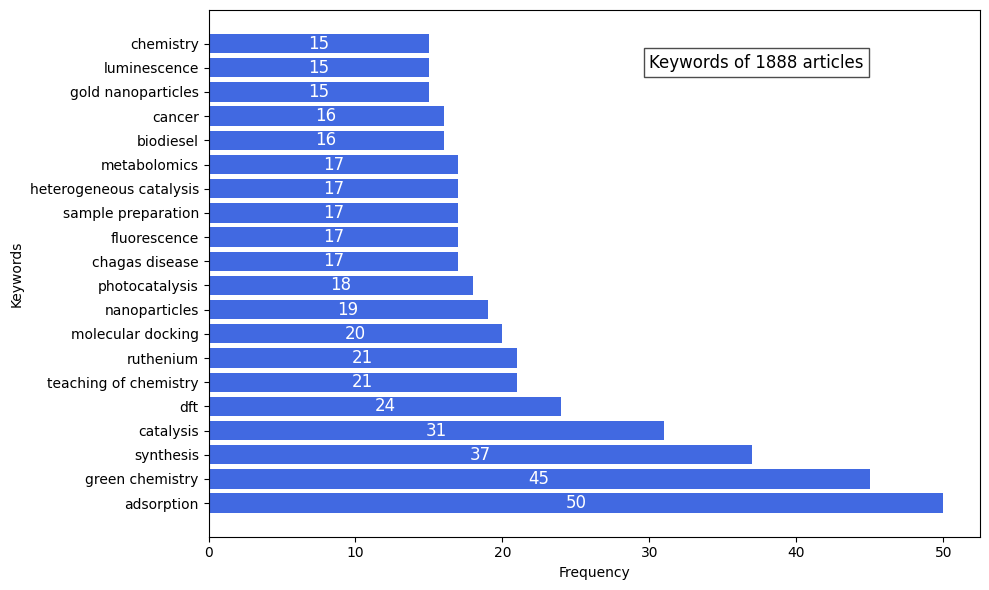

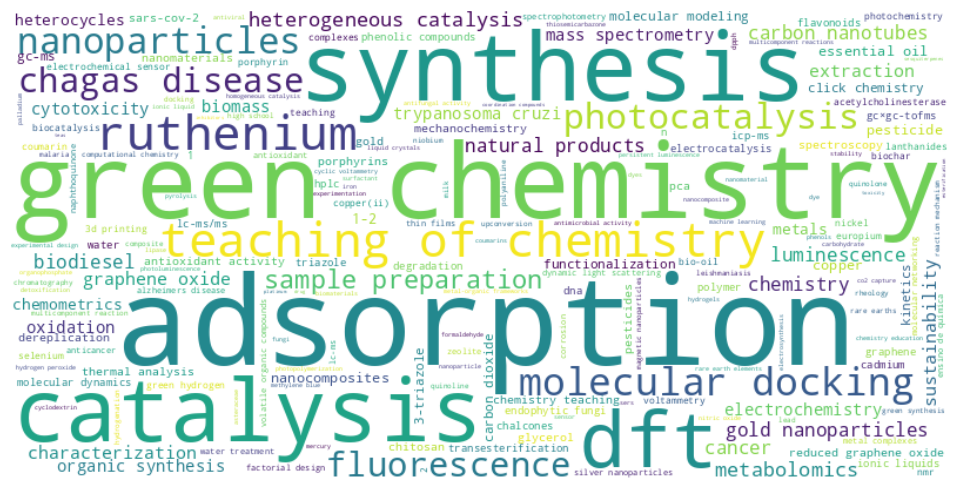

In [16]:
keywords = data['Keywords'].dropna()

all_keywords = (keywords.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))

mapped_keywords = all_keywords.apply(lambda x: reverse_map_keyword(x, keyword_mapping))
keyword_counts_geral = Counter(mapped_keywords)
top_keywords = keyword_counts_geral.most_common(20)
#print(top_keywords)
keywords, counts = zip(*top_keywords)

plot_keyword_bar(top_keywords, context_label="Keywords of 1888 articles")
plot_keyword_wordcloud(keyword_counts_geral)

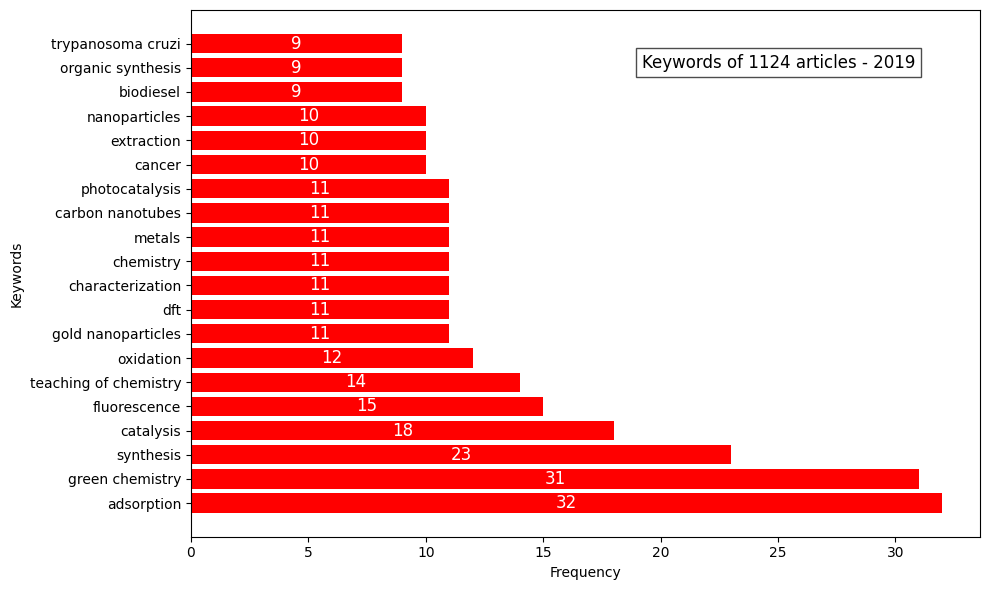

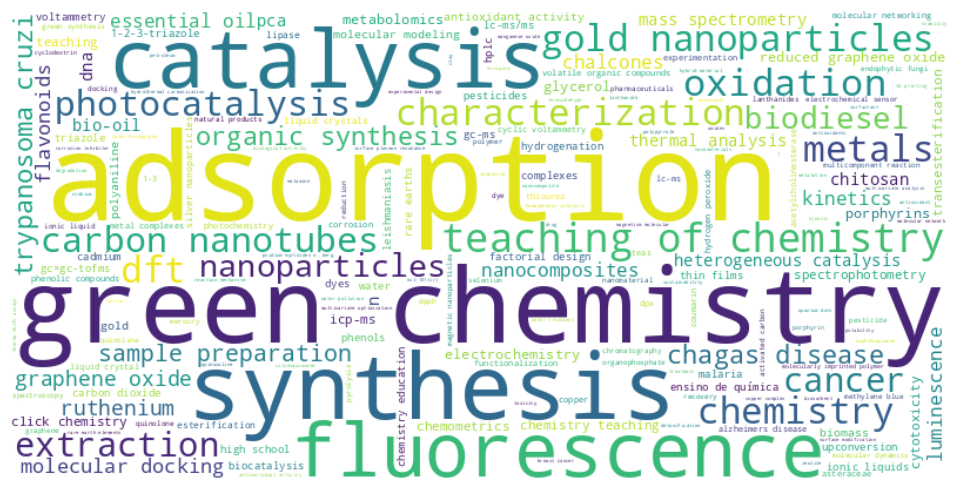

In [3]:
# Filter only articles from the year 2019
data_2019 = data[data['Year'] == 2019]

keywords = data_2019['Keywords'].dropna()
all_keywords = (keywords.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))

# Apply reverse mapping to standardize keyword terms
mapped_keywords = all_keywords.apply(lambda x: reverse_map_keyword(x, keyword_mapping))
keyword_counts_2019 = Counter(mapped_keywords)
top_keywords = keyword_counts_2019.most_common(20)
keywords, counts = zip(*top_keywords)

plot_keyword_bar(top_keywords, context_label="Keywords of 1124 articles - 2019", bar_color="red")
plot_keyword_wordcloud(keyword_counts_2019)


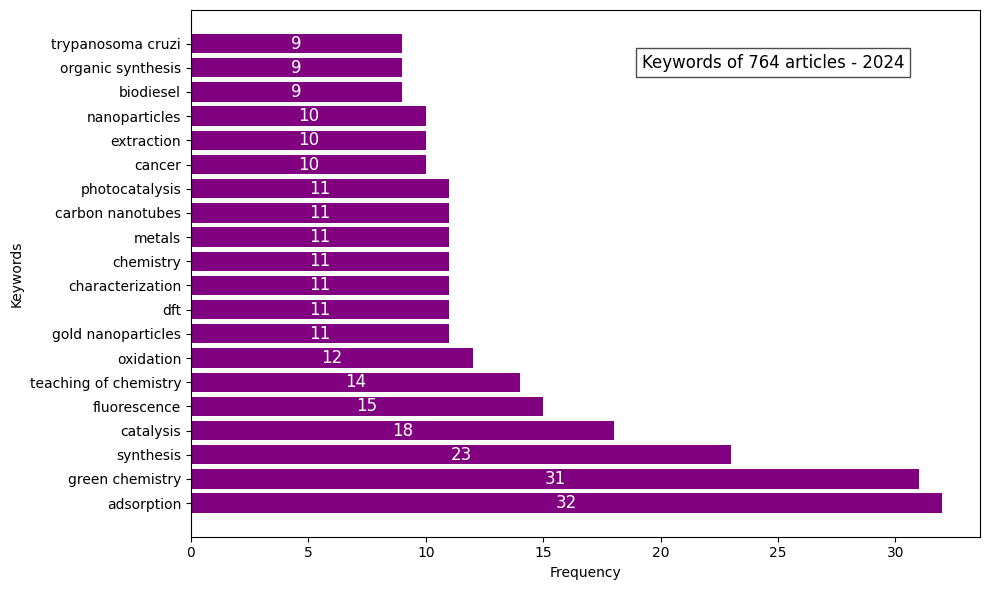

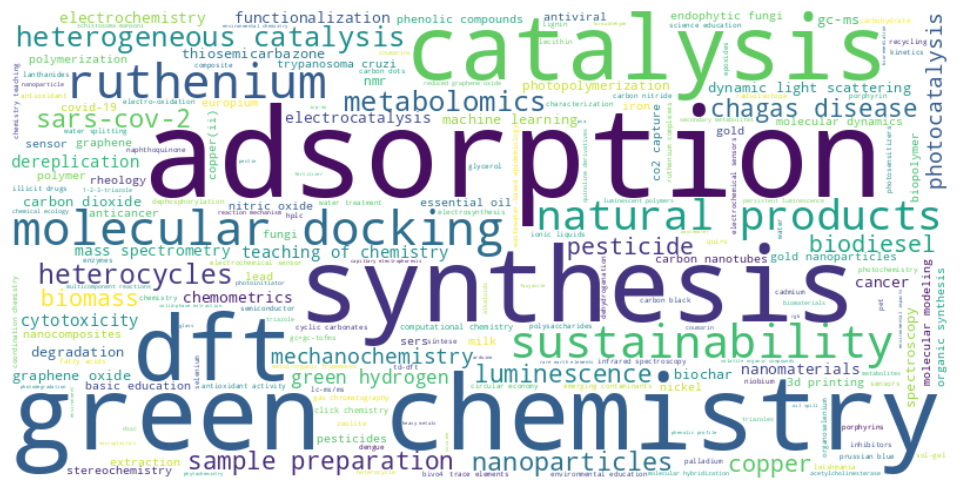

In [4]:
# Filter only articles from the year 2019
data_2019 = data[data['Year'] == 2024]

# Extract and process keywords from the filtered DataFrame
keywords = data_2019['Keywords'].dropna()
all_keywords = (keywords.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))
mapped_keywords = all_keywords.apply(lambda x: reverse_map_keyword(x, keyword_mapping))
keyword_counts_2024 = Counter(mapped_keywords)
top_keywords = keyword_counts_2019.most_common(20)
keywords, counts = zip(*top_keywords)

plot_keyword_bar(top_keywords, context_label="Keywords of 764 articles - 2024", bar_color="purple")
plot_keyword_wordcloud(keyword_counts_2024)

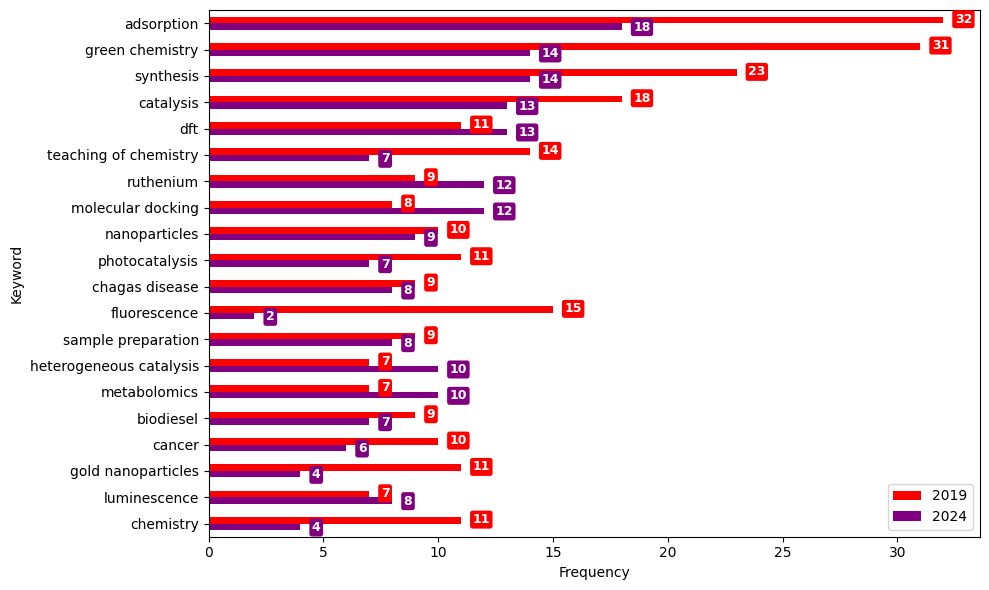

In [ ]:
print(keyword_counts_2019)
print(keyword_counts_2024)

# Suponha que você já tenha os Counters
plot_comparison_bar(
    counts_a=keyword_counts_2019,
    counts_b=keyword_counts_2024,
    label_a="2019",
    label_b="2024",
    #title="Keyword Frequency Comparison: 2019 vs 2024"
)

In [5]:
import csv

# Calculate totals
total_2019 = sum(keyword_counts_2019.values())
total_2024 = sum(keyword_counts_2024.values())

# Get all unique area codes for consistent ordering
all_areas = sorted(list(set(keyword_counts_2019.keys()) | set(keyword_counts_2024.keys())))

# Prepare data for CSV
csv_rows = []
csv_rows.append(['Area Code', '2019 Count', '2019 Percentage (%)', '2024 Count', '2024 Percentage (%)', 'Percentage Change (2019 to 2024)'])

for area in all_areas:
    count_2019 = keyword_counts_2019.get(area, 0)
    count_2024 = keyword_counts_2024.get(area, 0)

    percentage_2019 = (count_2019 / total_2019 * 100) if total_2019 > 0 else 0
    percentage_2024 = (count_2024 / total_2024 * 100) if total_2024 > 0 else 0

    percentage_change = percentage_2024 - percentage_2019

    csv_rows.append([
        area,
        count_2019,
        f"{percentage_2019:.2f}", # Format to two decimal places
        count_2024,
        f"{percentage_2024:.2f}", # Format to two decimal places
        f"{percentage_change:.2f}" # Format to two decimal places
    ])

# Define the output CSV file name
output_filename = 'research_keyword_comparison.csv'

# Write to CSV
with open(output_filename, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerows(csv_rows)

print(f"CSV file '{output_filename}' created successfully!")
print(f"Total abstracts in 2019: {total_2019}")
print(f"Total abstracts in 2024: {total_2024}")



CSV file 'research_keyword_comparison.csv' created successfully!
Total abstracts in 2019: 4810
Total abstracts in 2024: 3317


Count with bias

In [20]:
keyword_mapping = {
    'ab initio': ['ab-initio', 'ab initio calculations', 'cálculos ab initio', 'ab initio methods', "'ab initio", "'ab initio'", "ab initio'"],
    'hartree-fock': ['hartree-fock method'],
    'monte carlo': ['monte carlo simulation', 'monte carlo simulations'],
    'dft': ["'dft", "dft'", "density functional theory dft", "density functional theory"],
    'molecular dynamics': ['molecular dynamics simulations', 'dinâmica molecular'],
    'computacional chem': ['computacional chemistry', 'química computacional'],
    'absorption': ['absorção'],
    'electronic structure': ['estrutura eletronica'],
    'semiempirical methods': ['métodos semiempíricos', 'métodos semiempírico', 'semi-empirical methods'],
    'spectroscopy': ['espectroscopia', 'spectroscopies', 'spectrometric analysis'],
    'molecular mechanics': ['mecânica molecular'],
    'molecular simulation': ['simulação molecular'],
    'catalysis': ['catálise', 'catalytic process', 'catalysts', 'catalytic'],
    'b3lyp': ['b3lyp'],

    # New entries added from your list:
    'adsorption': ["'adsorption", 'adsorção', 'adsorbate', 'adsorbent'],
    'green chemistry': ['química verde', 'green chem'],
    'synthesis': ["'synthesis", 'síntese', 'chemical synthesis', 'sintese'],
    'teaching of chemistry': ['ensino de química', 'química educacional', 'chemistry teaching', 'education in chemistry'],
    'ruthenium': ['ru complex', 'ru compounds', 'ruthenium complex'],
    'molecular docking': ['docking molecular', 'acoplamento molecular'],
    'nanoparticles': ['nanopartículas', 'nano particles', 'nps', 'nano-objects'],
    'chagas disease': ['doença de chagas', 'tripanossomíase americana','Trypanosoma cruzi'],
    'fluorescence': ['fluorescência'],
    'sample preparation': ['preparo de amostra', 'preparação da amostra'],
    'metabolomics': ['metabolômica'],
    'biodiesel': ['bio-diesel'],
    'cancer': ['câncer', 'tumor', 'oncology'],
    'gold nanoparticles': ['au nanoparticles', 'au nps', 'gold nps', 'nanopartículas de ouro'],
    'luminescence': ['luminiscência', 'emission', 'photoluminescence'],
    'natural products': ['produtos naturais', 'natural compounds', 'produtos da natureza']
}


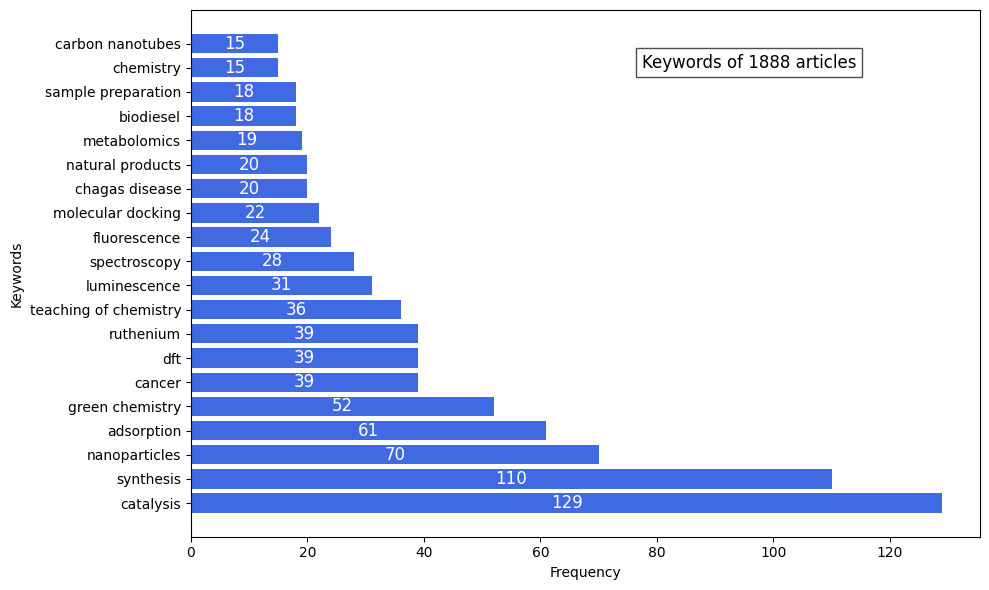

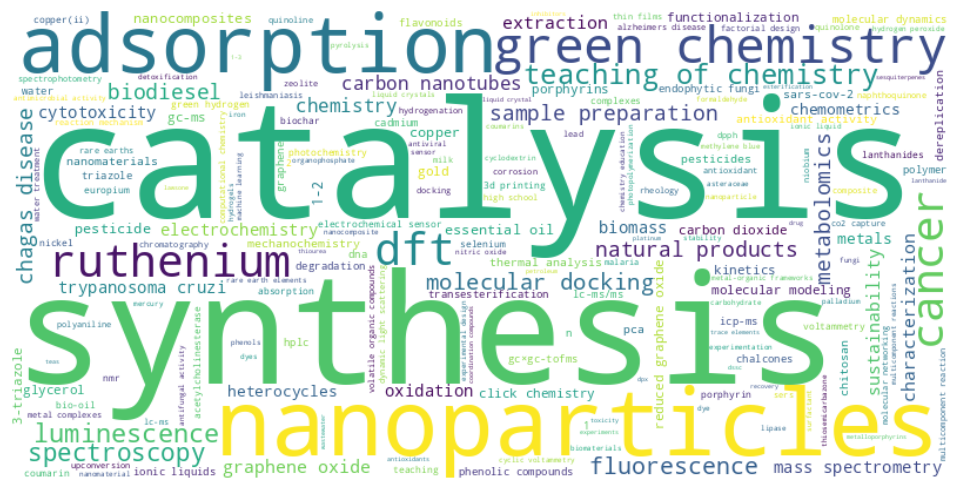

In [ ]:
# Filter keywords column (remove NaN values)
keywords = data['Keywords'].dropna()

all_keywords = (keywords.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))


mapped_keywords = all_keywords.apply(lambda x: reverse_map_keyword(x, keyword_mapping))
keyword_counts = Counter(mapped_keywords)
top_keywords = keyword_counts.most_common(20)
#print(top_keywords)
keywords, counts = zip(*top_keywords)

plot_keyword_bar(top_keywords, context_label="Keywords of 1888 articles")
plot_keyword_wordcloud(keyword_counts)

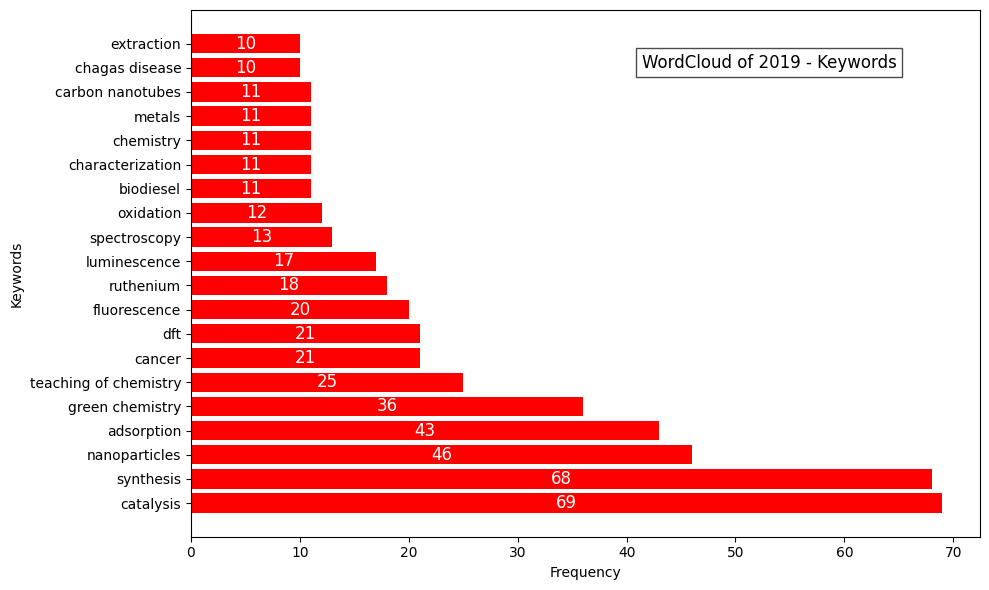

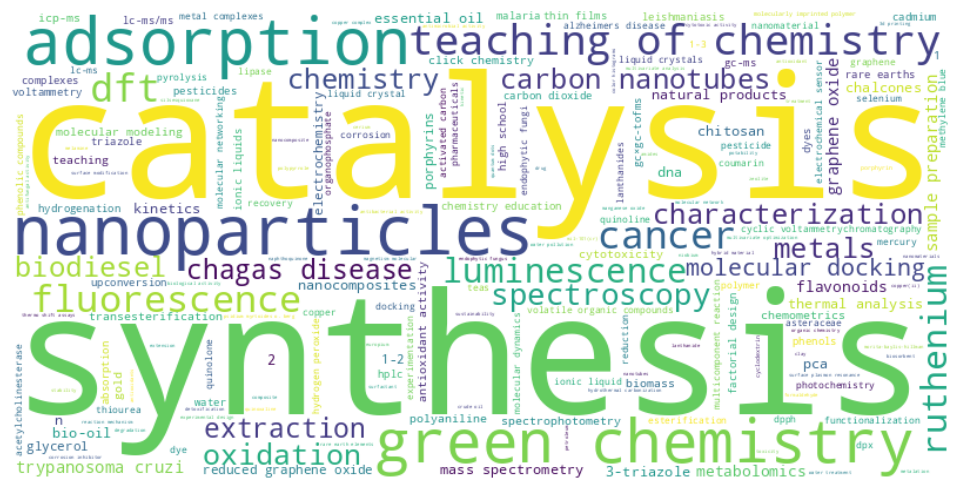

In [ ]:
data_2019 = data[data['Year'] == 2019]

keywords = data_2019['Keywords'].dropna()

all_keywords = (keywords.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))
mapped_keywords = all_keywords.apply(lambda x: reverse_map_keyword(x, keyword_mapping))
keyword_counts = Counter(mapped_keywords)
top_keywords = keyword_counts.most_common(20)
keywords, counts = zip(*top_keywords)

plot_keyword_bar(top_keywords, context_label="WordCloud of 2019 - Keywords", bar_color="red")
plot_keyword_wordcloud(keyword_counts)

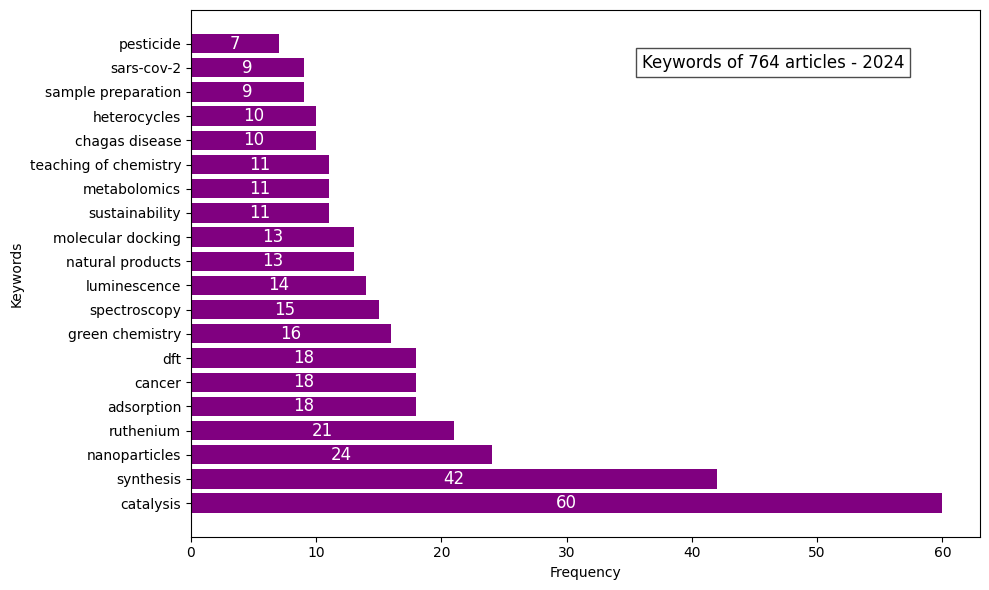

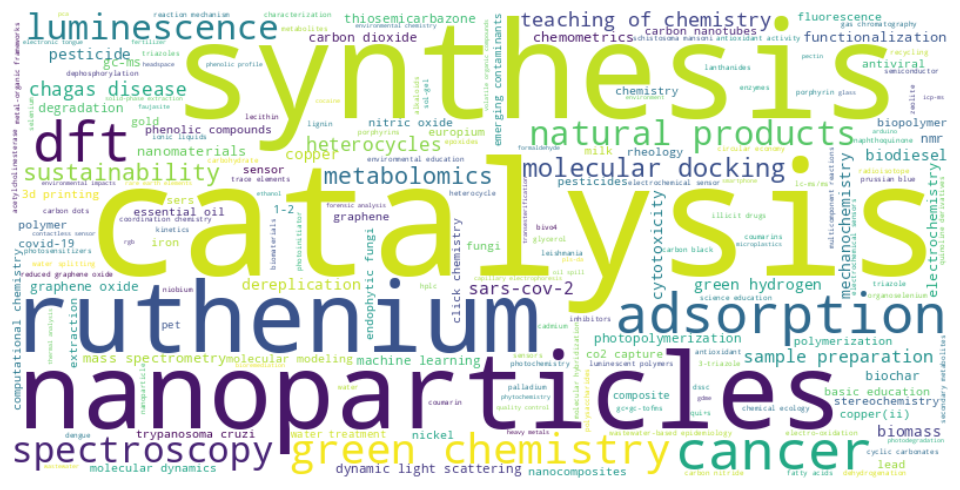

In [23]:

# Filtrar apenas os artigos do ano de 2019
data_2024 = data[data['Year'] == 2024]


keywords = data_2024['Keywords'].dropna()
all_keywords = (keywords.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))

mapped_keywords = all_keywords.apply(lambda x: reverse_map_keyword(x, keyword_mapping))
#print(mapped_keywords)
keyword_counts = Counter(mapped_keywords)
#print(keyword_counts.most_common(100))
keyword_counts = Counter(mapped_keywords)
top_keywords = keyword_counts.most_common(20)
keywords, counts = zip(*top_keywords)

plot_keyword_bar(top_keywords, context_label="Keywords of 764 articles - 2024", bar_color="purple")
plot_keyword_wordcloud(keyword_counts)